In [27]:
import numpy as np
import  skfuzzy as fuzzy
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [28]:
mte = ctrl.Antecedent(np.arange(1,41,1),'MTE') #ctrl - control the input values , 'mte' is a label name
#devide the categoris - poor,average,good
mte['Poor'] = fuzzy.trimf(mte.universe,[1,5,15]) #mte - universal set, we are taking poor marks from the universal marks

mte['Average'] = fuzzy.trapmf(mte.universe,[13,20,28,30]) #range which is from universe set

mte['Good'] = fuzzy.trimf(mte.universe,[20,26,40]) #40 is the best marks
                    #2-D  universal set, 
                    # 20 - lowest peak
                    # 26 - highest peak
                    # 40 - highest mark

In [29]:
ete = ctrl.Antecedent(np.arange(1,71,1),'ETE') #givin label name is compuslary

ete['Poor'] = fuzzy.trimf(ete.universe,[1,10,20])

ete['Average'] = fuzzy.trapmf(ete.universe,[20,25,35,45])

ete['Good'] = fuzzy.trimf(ete.universe,[40,56,70])

In [30]:
ca = ctrl.Antecedent(np.arange(1,41,1),'CA')

ca['Poor'] = fuzzy.trimf(ca.universe,[1,5,15])

ca['Average'] = fuzzy.trapmf(ca.universe,[13,20,25,30])

ca['Good'] = fuzzy.trimf(ca.universe,[20,30,40])

In [31]:
cgpa = ctrl.Consequent(np.arange(1,11,1),'cgpa')



In [32]:
cgpa.automf(3) #it changes everything to small letters

In [33]:
#automf function is used to draw the graph for the vlaue obtained
#for defining rules
rule1 = ctrl.Rule(ca['Average'] & mte['Poor'] & ete['Good'], cgpa['good'])

In [34]:
#deffuzification
tipping = ctrl.ControlSystem([rule1])
#tipping means we have to convert the value that are present in fuzzy set in num, that is called deffuzification
Tip = ctrl.ControlSystemSimulation(tipping)
Tip.input['CA'] = 16
Tip.input['MTE'] = 5
Tip.input['ETE'] = 61

Tip.compute()
print(Tip.output['cgpa'])

8.139918127427311


c:\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


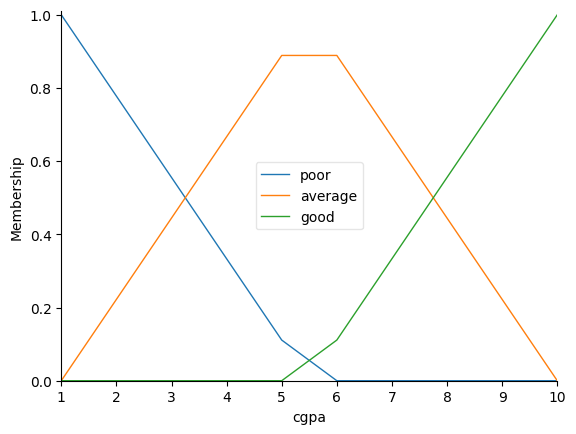

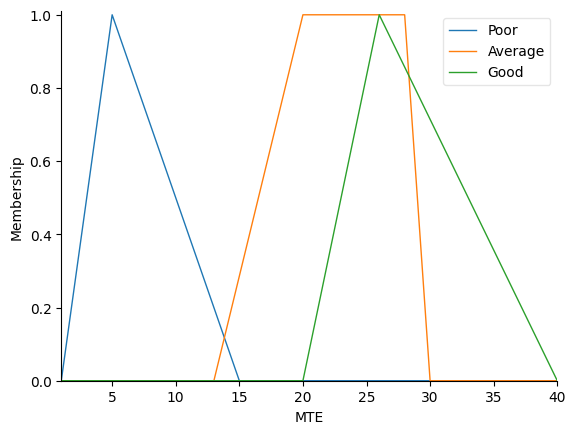

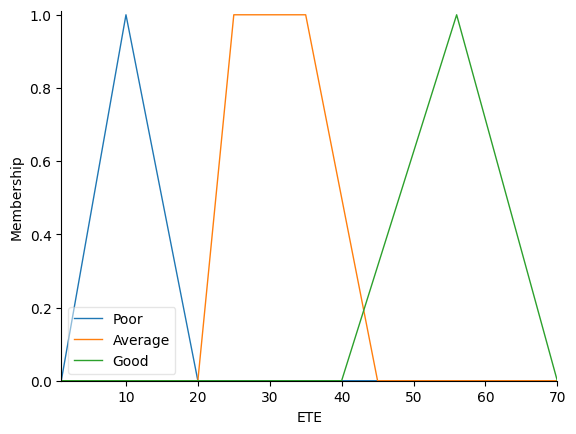

In [35]:
cgpa.view()
mte.view()
ete.view()
plt.show()